In [124]:
t_lgb = lgb_model.model.predict(x_valid)
t_xgb = xgb_model.model.predict(xgb.DMatrix(x_valid))

findint the best weights

In [127]:
def Weight_Rgs(w_lgb):
    w_xgb = 1.0 - w_lgb
    combine_oof_pred = w_lgb*t_lgb + w_xgb*t_xgb
    score = eval_qwk_lgb_regr(y_valid, combine_oof_pred)
    print('weighted score equals {}'.format(score))
    return score

weighted score equals ('cappa', 0.5460032091550869, True)
step 0
weighted score equals ('cappa', 0.5460032091550869, True)
step 1
weighted score equals ('cappa', 0.5460032091550869, True)
step 2
weighted score equals ('cappa', 0.5484811643487824, True)
step 3
weighted score equals ('cappa', 0.5506051259433784, True)
step 4
weighted score equals ('cappa', 0.5523750939388752, True)
step 5
weighted score equals ('cappa', 0.5534370747361732, True)
step 6
weighted score equals ('cappa', 0.5548530491325706, True)
step 7
weighted score equals ('cappa', 0.556269023528968, True)
step 8
weighted score equals ('cappa', 0.5598089595199616, True)
step 9
weighted score equals ('cappa', 0.5598089595199616, True)
step 10
weighted score equals ('cappa', 0.5615789275154582, True)
step 11
weighted score equals ('cappa', 0.5644108763082529, True)
step 12
weighted score equals ('cappa', 0.5637028891100544, True)
step 13
weighted score equals ('cappa', 0.5654728571055511, True)
step 14
weighted score equals

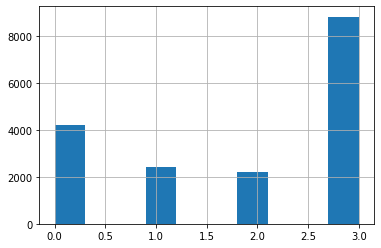

In [128]:
def random_search(start, end, step=0.1):
    itera = 0
    max_w = start
    max_score = Weight_Rgs(max_w)
    while start <= end:
        print('step {}'.format(itera))
        score = Weight_Rgs(start)
        if score > max_score:
            max_w = start
            max_score = score
        start += step
        itera += 1
    print('max weight: lgb{} xgb{}'.format(max_w, 1 - max_w))
    print('max weighted score equals {}'.format(score))
    return max_w

w_rgs = random_search(0.0, 1.0, step=0.01)


In [129]:
print(w_rgs)

0.8400000000000005


In [ ]:
weights = {'lbg': w_rgs, 'cat': 0, 'xgb':1-w_rgs, 'nn': 0.00}

final_pred = (lgb_model.y_pred * weights['lbg']) + (xgb_model.y_pred * weights['xgb']) 
#final_pred = cnn_model.y_pred
print(final_pred.shape)